<img src="./images/banner.png" width="800">

# Matrix Plots in Seaborn

Matrix plots are powerful visualization tools used to represent complex, multi-dimensional data in a two-dimensional format. These plots are particularly useful for displaying relationships between variables, identifying patterns, and visualizing large datasets in a compact and interpretable manner.


🔑 **Key Concept:** Matrix plots transform numerical data into color-coded grids, where each cell's color represents a value, making it easier to spot trends and correlations.


In the realm of data visualization, matrix plots serve several crucial purposes:

- Matrix plots excel at showing how different variables in a dataset relate to each other. By representing data as a color-coded grid, they allow viewers to quickly identify patterns, correlations, and clusters within the data.

- When dealing with datasets containing numerous variables or observations, traditional scatter plots or line charts can become cluttered and difficult to interpret. Matrix plots offer a scalable solution, efficiently representing large amounts of data in a compact format.

- Some types of matrix plots, such as clustermaps, incorporate hierarchical clustering algorithms. This feature groups similar variables or observations together, revealing underlying structures in the data that might not be immediately apparent.


Matrix plots find applications in various fields:

- In biology, for visualizing gene expression data
- In finance, for analyzing stock market correlations
- In machine learning, for displaying confusion matrices
- In social sciences, for representing survey response patterns


💡 **Pro Tip:** When working with matrix plots, consider the color scheme carefully. The choice of colors can significantly impact the interpretation of the data.


Seaborn, a statistical data visualization library built on top of matplotlib, offers two primary types of matrix plots:

1. **Heatmaps**: These are the most basic form of matrix plots, representing values in a data matrix as colors.

2. **Clustermaps**: These are enhanced heatmaps that incorporate hierarchical clustering, rearranging rows and columns to group similar data points together.


In the following sections, we'll dive deeper into each of these plot types, exploring their creation, customization, and practical applications.


❗️ **Important Note:** While matrix plots are powerful, they can be overwhelming for viewers unfamiliar with them. Always consider your audience when choosing to use a matrix plot and be prepared to explain how to interpret the visualization.


As we proceed, we'll explore how to create these plots using Seaborn, interpret the resulting visualizations, and apply best practices to make our matrix plots both informative and visually appealing.

**Table of contents**<a id='toc0_'></a>    
- [Heatmaps: Visualizing 2D Data](#toc1_)    
  - [Enhancing Heatmaps with Annotations](#toc1_1_)    
  - [Customizing Heatmap Appearance](#toc1_2_)    
  - [Real-World Applications](#toc1_3_)    
- [Clustermap: Hierarchical Clustering with Heatmaps](#toc2_)    
  - [Customizing Clustermaps](#toc2_1_)    
  - [Adding Row Colors](#toc2_2_)    
  - [Adjusting Clustermap Layout](#toc2_3_)    
  - [Real-World Application: Gene Expression Analysis](#toc2_4_)    
- [Summary](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc1_'></a>[Heatmaps: Visualizing 2D Data](#toc0_)

Heatmaps are a powerful and versatile tool for visualizing two-dimensional data. They represent values in a data matrix as colors, allowing viewers to quickly identify patterns, trends, and outliers in complex datasets.


🔑 **Key Concept:** Heatmaps encode numerical values as colors, creating a visual representation of data that's both intuitive and information-dense.


Let's start by creating a basic heatmap using Seaborn. We'll use a dataset about different types of glue and their performance on various tasks.


Text(0.5, 1.0, 'Glue Performance Across Different Tasks')

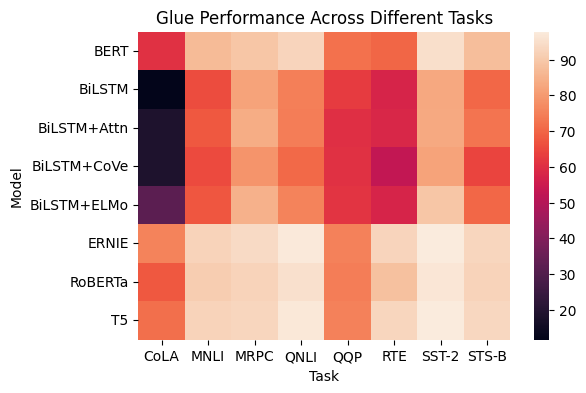

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load and prepare the data
glue = sns.load_dataset("glue").pivot(index="Model", columns="Task", values="Score")

# Create a basic heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(glue)
plt.title("Glue Performance Across Different Tasks")

This code will produce a heatmap showing the performance of different glue models across various tasks. The color intensity represents the score, with darker colors typically indicating higher values.


Heatmaps are particularly useful when:

1. Visualizing correlation matrices
2. Displaying confusion matrices in machine learning
3. Representing large datasets with many variables
4. Showing patterns in temporal or spatial data


However, heatmaps may not be the best choice when:

1. Dealing with sparse data (many zero or missing values)
2. Precise numerical comparisons are needed
3. The dataset has extreme outliers that can skew the color scale
4. Working with categorical data that doesn't have a natural ordering


### <a id='toc1_1_'></a>[Enhancing Heatmaps with Annotations](#toc0_)


To make our heatmap more informative, we can add annotations showing the exact values in each cell.


Text(0.5, 1.0, 'Glue Performance Across Different Tasks (with Annotations)')

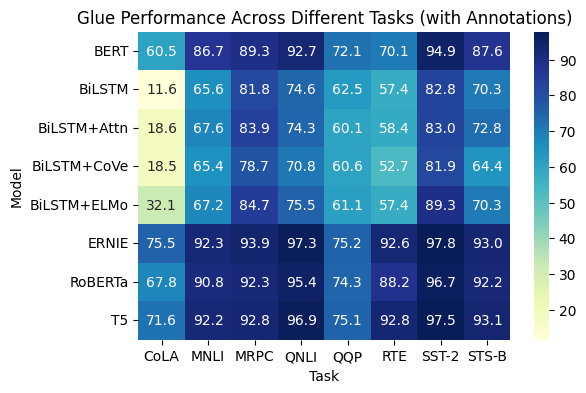

In [3]:
plt.figure(figsize=(6, 4))
sns.heatmap(glue, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title("Glue Performance Across Different Tasks (with Annotations)")

💡 **Pro Tip:** Use the `fmt` parameter to control the formatting of annotations. For example, `".1f"` displays numbers with one decimal place.


### <a id='toc1_2_'></a>[Customizing Heatmap Appearance](#toc0_)


Seaborn offers various options to customize the appearance of heatmaps:


Text(0.5, 1.0, 'Customized Glue Performance Heatmap')

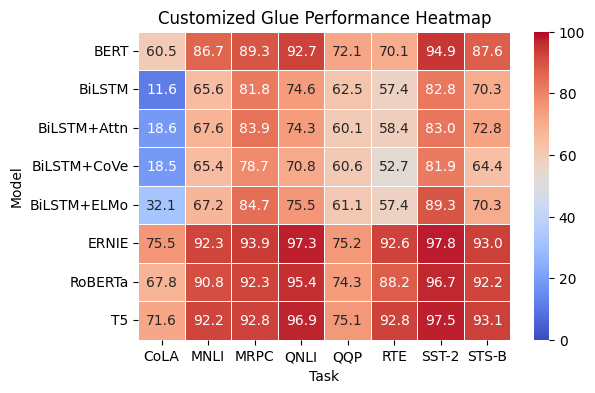

In [9]:
plt.figure(figsize=(6, 4))
sns.heatmap(
    glue,
    annot=True,
    fmt=".1f",
    cmap="coolwarm",
    linewidths=0.5,
    vmin=0,
    center=50,
    vmax=100,
)
plt.title("Customized Glue Performance Heatmap")

In this example, we've:
- Used a diverging colormap (`"coolwarm"`)
- Added lines between cells
- Centered the colormap at 0
- Set the minimum and maximum values for the color scale


### <a id='toc1_3_'></a>[Real-World Applications](#toc0_)


Heatmaps are excellent for visualizing correlation matrices. Let's use the Iris dataset as an example:


Text(0.5, 1.0, 'Correlation Matrix of Iris Dataset')

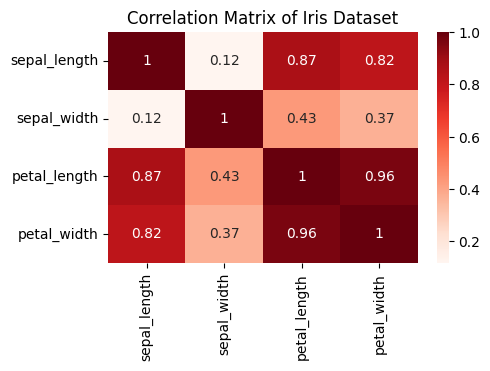

In [26]:
import numpy as np


iris = sns.load_dataset("iris").drop(columns=["species"])
correlation_matrix = np.abs(iris.corr())

plt.figure(figsize=(5, 3))
sns.heatmap(correlation_matrix, annot=True, cmap="Reds")
plt.title("Correlation Matrix of Iris Dataset")

This heatmap clearly shows the relationships between different features in the Iris dataset. The diagonal will always be 1 (perfect correlation with itself), while other cells show the correlation between pairs of features.


In machine learning, heatmaps are often used to visualize confusion matrices. Here's an example using simulated data:


Text(0.5, 3.722222222222216, 'Predicted label')

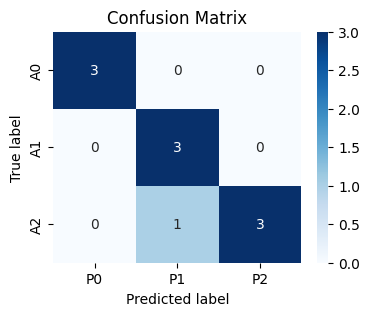

In [20]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Simulated data
y_true = np.array([0, 1, 2, 2, 1, 0, 1, 2, 2, 0])
y_pred = np.array([0, 1, 1, 2, 1, 0, 1, 2, 2, 0])

conf_matrix = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(4, 3))
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["P0", "P1", "P2"],
    yticklabels=["A0", "A1", "A2"],
)
plt.title("Confusion Matrix")
plt.ylabel("True label")
plt.xlabel("Predicted label")

This heatmap clearly shows which classes are being confused with each other in a classification task.


❗️ **Important Note:** When creating heatmaps for correlation matrices or confusion matrices, it's often helpful to use a diverging colormap centered at 0 for correlations, or a sequential colormap for confusion matrices.


Heatmaps are a powerful tool in the data scientist's arsenal, capable of conveying complex information in an intuitive, visual format. By mastering Seaborn's heatmap function, you can create insightful visualizations for a wide range of data types and analysis tasks.


Effective use of heatmaps can significantly enhance your ability to communicate patterns and relationships in your data, leading to more impactful data storytelling and clearer insights for stakeholders.

## <a id='toc2_'></a>[Clustermap: Hierarchical Clustering with Heatmaps](#toc0_)

Clustermaps are an advanced form of heatmaps that incorporate hierarchical clustering, providing a powerful tool for exploring and visualizing complex datasets. They combine the color-encoding of heatmaps with dendrograms that show the hierarchical relationships between rows and columns.


🔑 **Key Concept:** Clustermaps group similar rows and columns together, revealing underlying structures and patterns in the data that might not be immediately apparent in a standard heatmap.


Let's start by creating a basic clustermap using the Iris dataset:


Text(0.5, 1.0, 'Iris Dataset Clustermap')

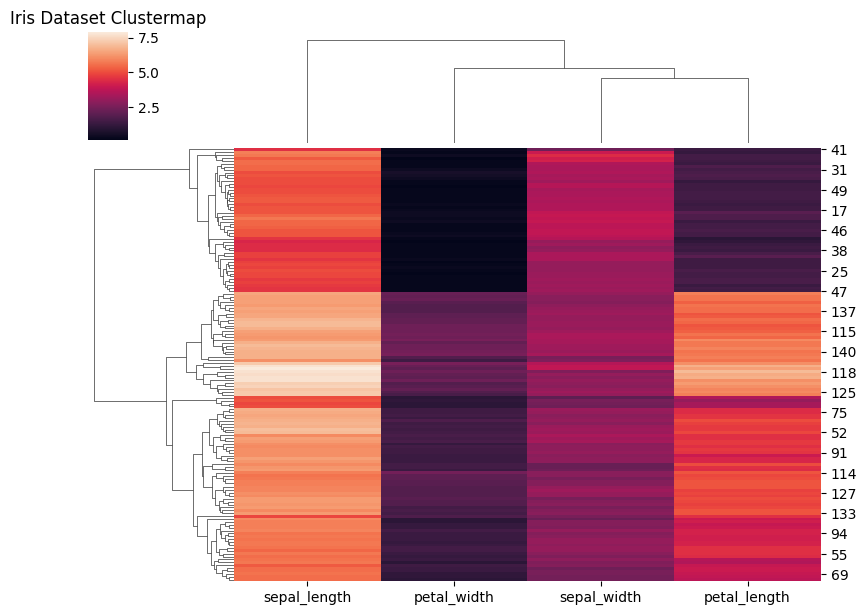

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the iris dataset
iris = sns.load_dataset("iris")
iris_numeric = iris.drop("species", axis=1)

# Create a basic clustermap
sns.clustermap(iris_numeric, figsize=(8, 6))
plt.title("Iris Dataset Clustermap")

This code produces a clustermap showing the relationships between different iris measurements, with dendrograms on both axes showing the hierarchical clustering of rows and columns.


Clustermaps are particularly useful when:

1. Exploring datasets with many variables to identify groups or clusters
2. Analyzing gene expression data in bioinformatics
3. Investigating customer segmentation in marketing
4. Studying ecological communities and species interactions

However, clustermaps may not be the best choice when:

1. The dataset is small or has few variables
2. The order of rows or columns has inherent meaning (e.g., time series data)
3. The audience is not familiar with interpreting dendrograms
4. Real-time or frequently updated visualizations are needed, as clustering can be computationally intensive


### <a id='toc2_1_'></a>[Customizing Clustermaps](#toc0_)


Seaborn offers various options to customize clustermaps:


Text(0.5, 1.0, 'Customized Iris Dataset Clustermap')

<Figure size 800x600 with 0 Axes>

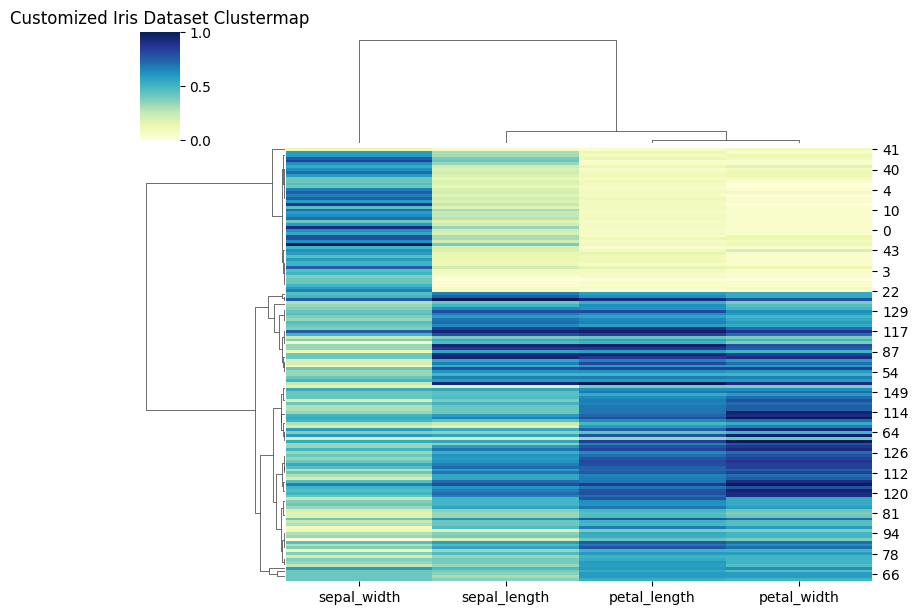

In [34]:
sns.clustermap(
    iris_numeric,
    cmap="YlGnBu",
    standard_scale=1,  # Standardize columns
    method="average",  # Linkage method
    metric="correlation",  # Distance metric
    figsize=(8, 6),
)
plt.title("Customized Iris Dataset Clustermap")

In this example, we've:
- Used a specific colormap
- Standardized the data within columns
- Specified the linkage method and distance metric for clustering


💡 **Pro Tip:** Experiment with different linkage methods (`single`, `complete`, `average`, `ward`) and distance metrics (`euclidean`, `correlation`, `manhattan`) to see how they affect the clustering results.


### <a id='toc2_2_'></a>[Adding Row Colors](#toc0_)


We can add color labels to identify different categories in our data:


Text(0.5, 1.0, 'Iris Dataset Clustermap with Species Colors')

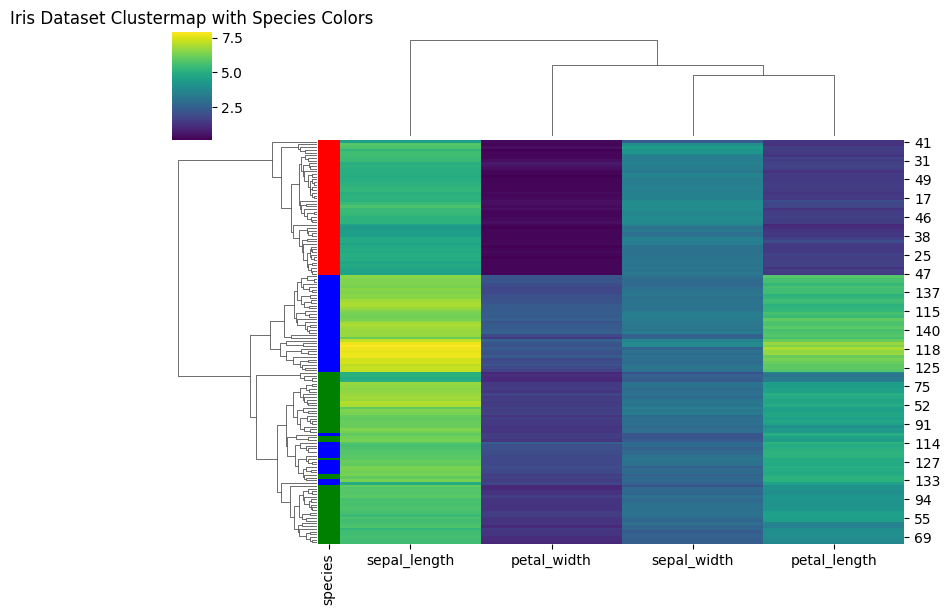

In [38]:
# Create a color mapping for species
species_colors = {"setosa": "red", "versicolor": "green", "virginica": "blue"}
row_colors = iris["species"].map(species_colors)

sns.clustermap(iris_numeric, row_colors=row_colors, cmap="viridis", figsize=(8, 6))
plt.title("Iris Dataset Clustermap with Species Colors")

This visualization adds a color bar on the left side of the clustermap, indicating the species of each iris sample.


### <a id='toc2_3_'></a>[Adjusting Clustermap Layout](#toc0_)


Seaborn allows fine-tuning of the clustermap layout:


Text(0.5, 2.05, 'Iris Dataset Clustermap with Custom Layout')

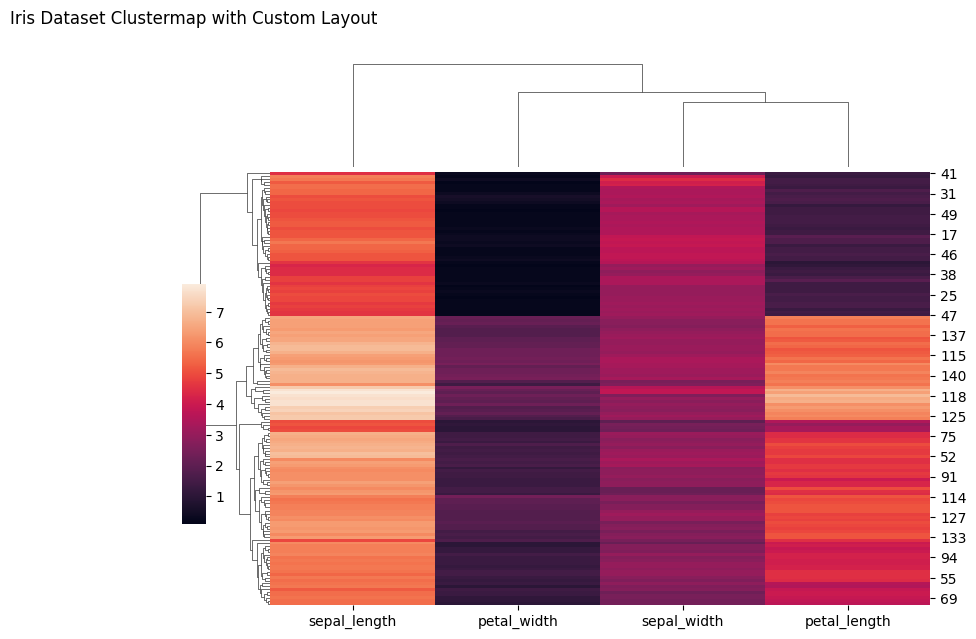

In [42]:
sns.clustermap(
    iris_numeric,
    figsize=(8, 6),
    row_cluster=True,
    col_cluster=True,
    dendrogram_ratio=(0.1, 0.2),
    cbar_pos=(0, 0.2, 0.03, 0.4),
)
plt.title("Iris Dataset Clustermap with Custom Layout", y=2.05)

Here, we've adjusted the size of the dendrograms and the position of the color bar.


### <a id='toc2_4_'></a>[Real-World Application: Gene Expression Analysis](#toc0_)


Clustermaps are widely used in bioinformatics for analyzing gene expression data. Let's simulate a gene expression dataset:


Text(0.5, 1.0, 'Gene Expression Clustermap')

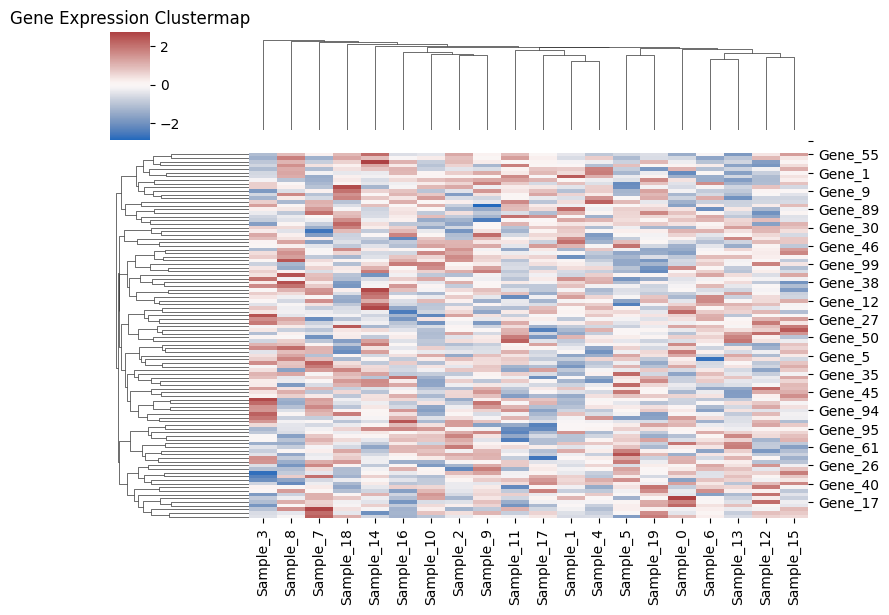

In [44]:
import numpy as np
import pandas as pd

# Simulate gene expression data
np.random.seed(0)
n_genes = 100
n_samples = 20
gene_exp = pd.DataFrame(
    np.random.randn(n_genes, n_samples),
    columns=[f"Sample_{i}" for i in range(n_samples)],
    index=[f"Gene_{i}" for i in range(n_genes)],
)

# Create conditions
conditions = np.repeat(["Control", "Treatment"], n_samples // 2)
col_colors = pd.Series(conditions).map(
    {"Control": "lightblue", "Treatment": "lightgreen"}
)

# Create the clustermap
sns.clustermap(
    gene_exp,
    col_colors=col_colors,
    z_score=0,  # Normalize the data within rows
    cmap="vlag",
    center=0,
    figsize=(8, 6),
)
plt.title("Gene Expression Clustermap")

This clustermap visualizes the expression levels of 100 genes across 20 samples, with color-coding to distinguish between control and treatment conditions.


❗️ **Important Note:** When working with large datasets, clustermaps can become computationally intensive. Consider using a subset of your data or increasing the `xticklabels` and `yticklabels` intervals if you encounter performance issues.


Clustermaps are a powerful tool for exploring complex, multi-dimensional datasets. By combining hierarchical clustering with heatmap visualization, they reveal patterns and structures that might be missed in traditional heatmaps or other visualization methods.


Effective use of clustermaps can lead to new insights in fields ranging from bioinformatics to marketing, helping researchers and analysts uncover hidden patterns and relationships in their data. By mastering Seaborn's clustermap function, you'll be equipped to tackle complex data analysis tasks and communicate your findings in a visually compelling manner.


## <a id='toc3_'></a>[Summary](#toc0_)

Matrix plots are powerful tools for visualizing complex, multi-dimensional data in a compact and interpretable format. Throughout this lecture, we've explored the various aspects of matrix plots in Seaborn, from basic heatmaps to advanced clustermaps and correlation matrices.


Matrix plots transform numerical data into color-coded grids, enabling the visualization of patterns, relationships, and structures within large datasets.


Matrix plots find applications across various fields:

- Bioinformatics: Visualizing gene expression data
- Finance: Analyzing asset correlations
- Machine Learning: Displaying confusion matrices
- Social Sciences: Representing survey response patterns
- Climate Science: Visualizing temperature or precipitation patterns over time and space


❗️ **Important Note:** While matrix plots are powerful, they can be complex for some audiences. Always consider your audience when choosing to use a matrix plot and be prepared to guide them through its interpretation.


As you apply these techniques to your own projects, remember that practice and experimentation are key to creating effective and insightful matrix plots. Happy visualizing!